In [1]:
import sys
sys.path.append("../")
import argparse
from bert_pytorch.dataset import WordVocab
from bert_pytorch import Predictor, Trainer
from logdeep.tools.utils import *


In [3]:
!python data_process.py

Parsing file: BGL.log
Total size after encoding is 4713493 4747963
Parsing done. [Time taken: 0:13:38.194350]
there are 37315 instances (sliding windows) in this dataset

training size 13718
test normal size 20579
test abnormal size 3018


In [6]:
options = dict()
options['device'] = 'cuda' if torch.cuda.is_available() else 'cpu'

options["output_dir"] = "../output/bgl/"
options["model_dir"] = options["output_dir"] + "bert/"
options["model_path"] = options["model_dir"] + "best_bert.pth"
options["train_vocab"] = options['output_dir'] + 'train'
options["vocab_path"] = options["output_dir"] + "vocab.pkl"

options["window_size"] = 128
options["adaptive_window"] = True
options["seq_len"] = 512
options["max_len"] = 512
options["min_len"] = 10

options["mask_ratio"] = 0.5

options["train_ratio"] = 1
options["valid_ratio"] = 0.1
options["test_ratio"] = 1

# features
options["is_logkey"] = True
options["is_time"] = False

options["hypersphere_loss"] = False
options["hypersphere_loss_test"] = False

options["scale"] = None
options["scale_path"] = options["model_dir"] + "scale.pkl"

# model
options["hidden"] = 256
options["layers"] = 4
options["attn_heads"] = 4

options["epochs"] = 2
options["n_epochs_stop"] = 10
options["batch_size"] = 32

options["corpus_lines"] = None
options["on_memory"] = True
options["num_workers"] = 5
options["lr"] = 1e-3
options["adam_beta1"] = 0.9
options["adam_beta2"] = 0.999
options["adam_weight_decay"] = 0.00
options["with_cuda"] = False
options["cuda_devices"] = None
options["log_freq"] = None

# predict
options["num_candidates"] = 15
options["gaussian_mean"] = 0
options["gaussian_std"] = 1

seed_everything(seed=1234)

In [7]:
with open(options["train_vocab"], 'r') as f:
    logs = f.readlines()
    vocab = WordVocab(logs)
    print("vocab_size", len(vocab))
    vocab.save_vocab(options["vocab_path"])

Building Vocab


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13718/13718 [00:00<00:00, 13807.32it/s]

vocab_size 197


Save options parameters
Loading vocab ../output/bgl/vocab.pkl
vocab Size:  197

Loading Train Dataset
before filtering short session
train size  12347
valid size  1371


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13718/13718 [00:02<00:00, 4980.91it/s]


Num of train seqs 5310
Num of valid seqs 1371

Loading valid Dataset
Creating Dataloader
Building BERT model
Creating BERT Trainer
Total Parameters: 2211014
Training Start


Epoch: 0 | phase: train, loss=4.924550537629561
logkey loss: 4.924550537629561, hyper loss: 0.0

Epoch: 0 | phase: valid, loss=3.945044228008815
logkey loss: 3.945044228008815, hyper loss: 0.0

Log saved
 Model Saved on: ../output/bgl/bert/best_bert.pth


Epoch: 1 | phase: train, loss=2.8430590159965283
logkey loss: 2.8430590159965283, hyper loss: 0.0

Epoch: 1 | phase: valid, loss=1.921412460860752
logkey loss: 1.921412460860752, hyper loss: 0.0

Log saved
 Model Saved on: ../output/bgl/bert/best_bert.pth


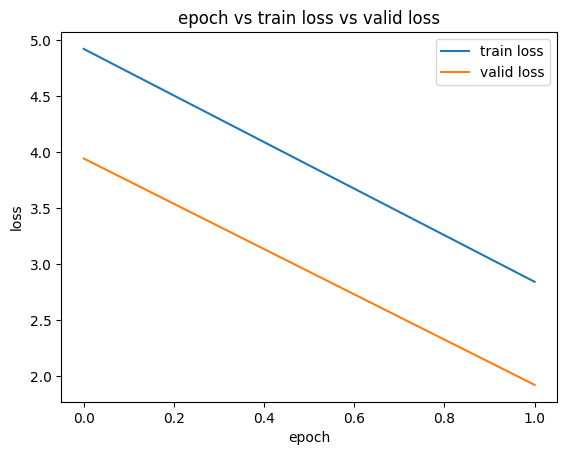

plot done


In [9]:
from bert_pytorch import Predictor, Trainer


Trainer(options).train()

In [10]:
Predictor(options).predict()

model_path: ../output/bgl/bert/best_bert.pth
test normal predicting


20579it [00:04, 4904.79it/s]

test_normal size: 10063


test_normal, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 20 , # of total logkey 39, deepSVDD_label: 0 

test_normal, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 62 , # of total logkey 125, deepSVDD_label: 0 

test_normal, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 195 , # of total logkey 378, deepSVDD_label: 0 

test_normal, #time anomaly: 0 # of undetected_tokens: 2, # of masked_tokens: 79 , # of total logkey 159, deepSVDD_label: 0 

test_normal, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 245 , # of total logkey 512, deepSVDD_label: 0 

test_normal, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 252 , # of total logkey 512, deepSVDD_label: 0 

test_normal, #time anomaly: 0 # of undetected_tokens: 0, # of masked_tokens: 86 , # of total logkey 181, deepSVDD_label: 0 

test_normal, #time anomaly: 0 # of undetected_tokens: 3, # of masked_tokens: 22 , # of total logkey 41, deepSVDD_label: 0 


3018it [00:00, 3516.00it/s]

test_abnormal size: 2626


test_abnormal, #time anomaly: 0 # of undetected_tokens: 262, # of masked_tokens: 262 , # of total logkey 512, deepSVDD_label: 0 

test_abnormal, #time anomaly: 0 # of undetected_tokens: 37, # of masked_tokens: 37 , # of total logkey 70, deepSVDD_label: 0 

test_abnormal, #time anomaly: 0 # of undetected_tokens: 27, # of masked_tokens: 27 , # of total logkey 49, deepSVDD_label: 0 

test_abnormal, #time anomaly: 0 # of undetected_tokens: 268, # of masked_tokens: 268 , # of total logkey 512, deepSVDD_label: 0 

test_abnormal, #time anomaly: 0 # of undetected_tokens: 45, # of masked_tokens: 147 , # of total logkey 330, deepSVDD_label: 0 

test_abnormal, #time anomaly: 0 # of undetected_tokens: 184, # of masked_tokens: 216 , # of total logkey 411, deepSVDD_label: 0 

test_abnormal, #time anomaly: 0 # of undetected_tokens: 22, # of masked_tokens: 23 , # of total logkey 50, deepSVDD_label: 0 

test_abnormal, #time anomaly: 0 # of undetected_tokens: 239, # of masked_tokens: 258 , # of total lo